## The Data

I will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club


Given historical data on loans I will build a model that can predict wether or nor a borrower will pay back their loan.
### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [7]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [9]:
df.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,...,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\nNorth Deniseber...
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,...,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\nEast Stephanie, TX..."
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,...,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\nFPO AE 30723
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,...,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\nFPO AP 22690
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,...,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\nMauricestad, VA 00813"


# Exploratory Data Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

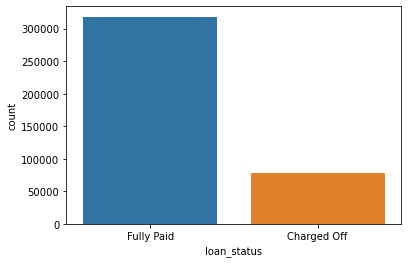

In [10]:
sns.countplot(x='loan_status',data=df)

<AxesSubplot:xlabel='loan_amnt'>

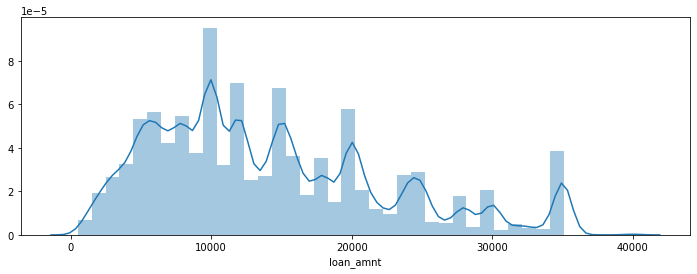

In [11]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],bins=40)

In [12]:
#Now I will explore the correlation between the continuous feature variables
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

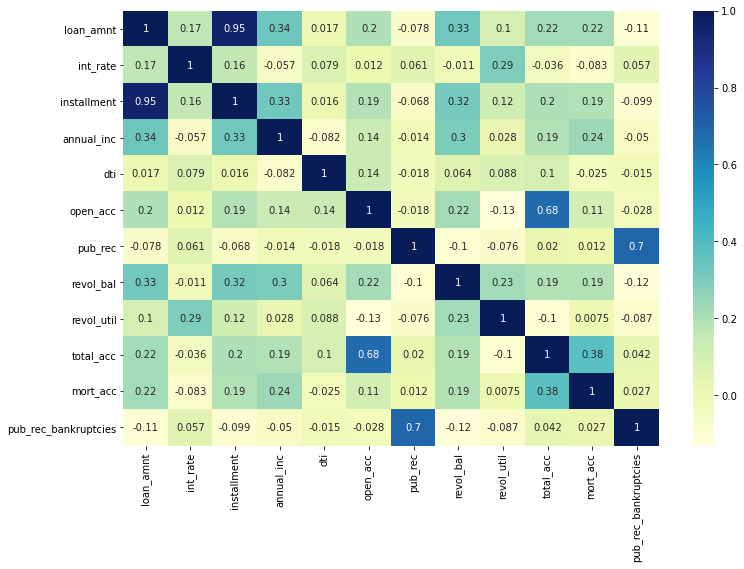

In [13]:
#Visualizing the correlation from above
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

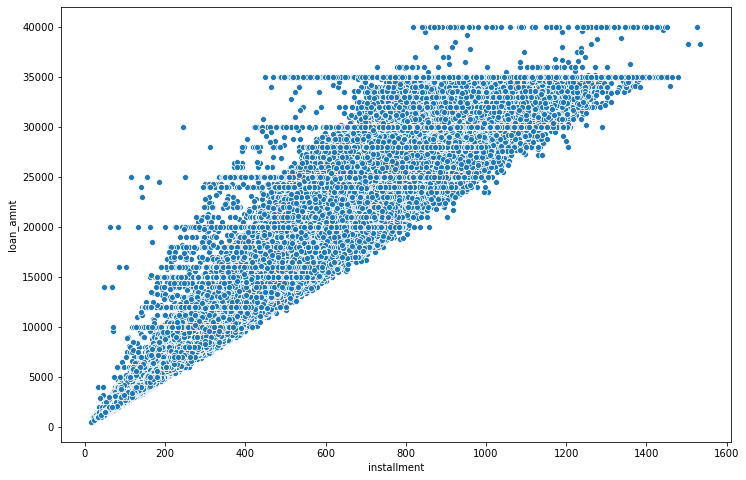

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='installment',y='loan_amnt',data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

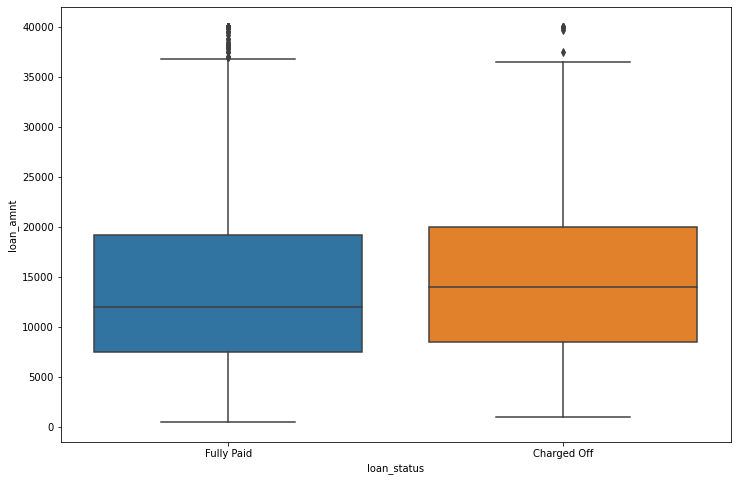

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [16]:
#SUMMARY OF ABOVE GRAPH
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [17]:
#Now to look into the Grades/Subgrades of the loans
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [18]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

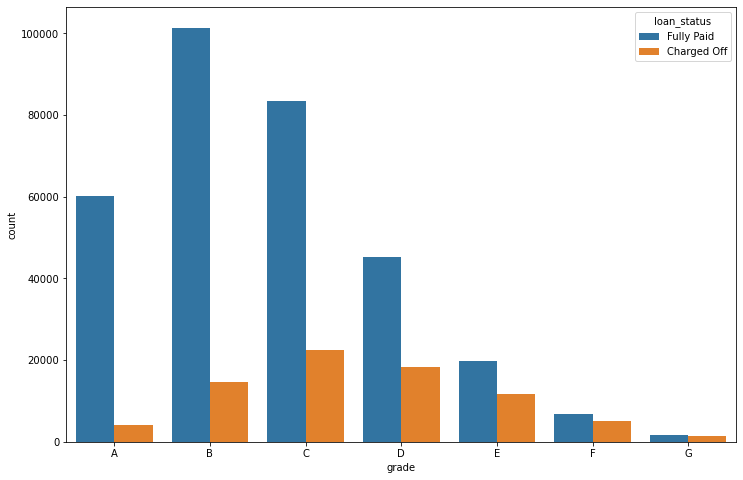

In [19]:
plt.figure(figsize=(12,8))
sns.countplot('grade',hue='loan_status',data=df,order=sorted(df['grade'].unique()))

In [20]:
sg = sorted(df['sub_grade'].unique())

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

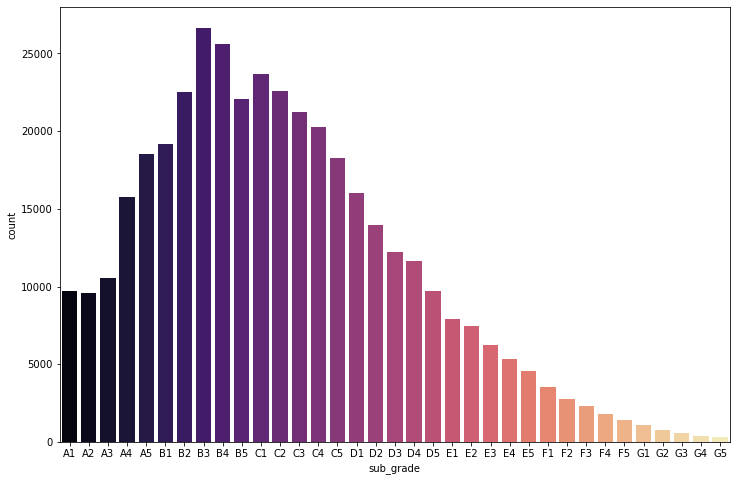

In [21]:
plt.figure(figsize=(12,8))
sns.countplot('sub_grade',data=df,order=sg,palette='magma')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

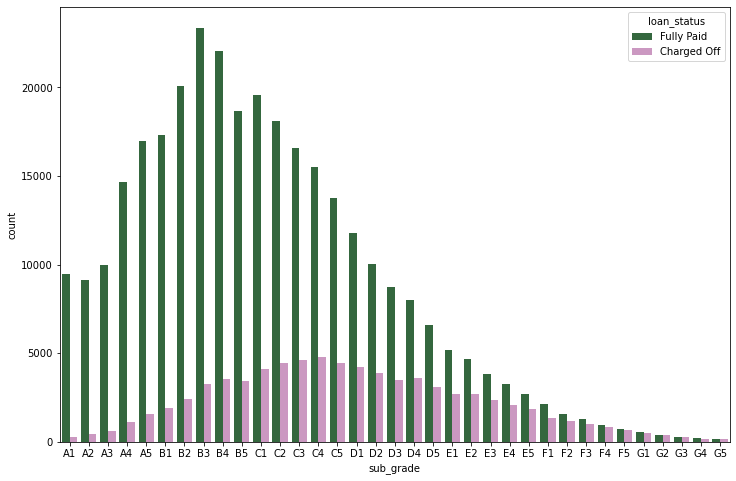

In [22]:
plt.figure(figsize=(12,8))
sns.countplot('sub_grade',hue='loan_status',data=df,order=sg,palette='cubehelix')

In [23]:
#As we see Loan's with subgrade E3-G5 hardly get paid off

In [24]:
#Below for creating a new new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off"
def fp(entry):
    if entry == 'Fully Paid':
        return 1
    else:
        return 0

In [25]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: fp(x))

In [26]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

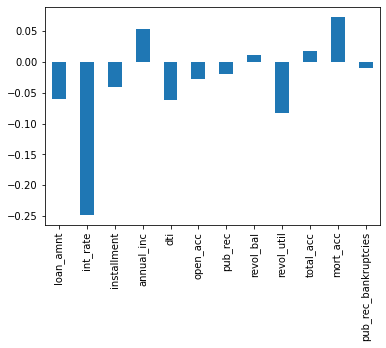

In [27]:
#Now showing the correlation of the numeric features to the new loan_repaid column
df.corr()['loan_repaid'].drop('loan_repaid').plot.bar()

<AxesSubplot:>

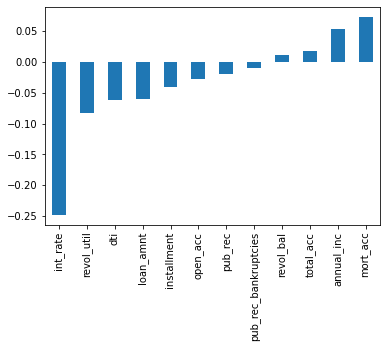

In [28]:
df.corr()['loan_repaid'].drop('loan_repaid').sort_values().plot.bar()


# DATA CLEANING/ENGINEERING




In [29]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [30]:
len(df)

396030

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [32]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [33]:
#Converts the above into a percentage of null values for further exploration
(df.isna().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [34]:
#Seems from the above that I may want to drop emp_title and emp_length, will double check the description to see what it is
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [35]:
#Checking # of Job titles and there values
df['emp_title'].value_counts()

Teacher                      4389
Manager                      4250
Registered Nurse             1856
RN                           1846
Supervisor                   1830
                             ... 
Events & Customer Ser           1
LaPorte County Government       1
Davita (Total Renal Care)       1
Barlag Tool                     1
Whose Mgr                       1
Name: emp_title, Length: 173105, dtype: int64

In [36]:
#Since there are too many unique jobs to convert into dummy variables with pandas, I will be removing emp_title
df = df.drop('emp_title',axis=1)

In [37]:
#Now to look into employment length
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [38]:
emp_length_sorted = [ '< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

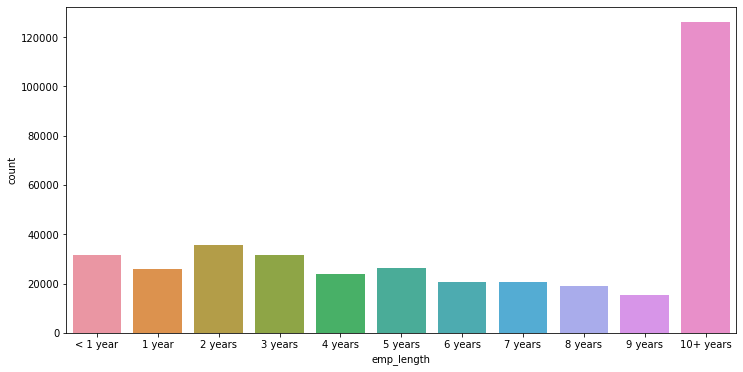

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',data=df,order=emp_length_sorted)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

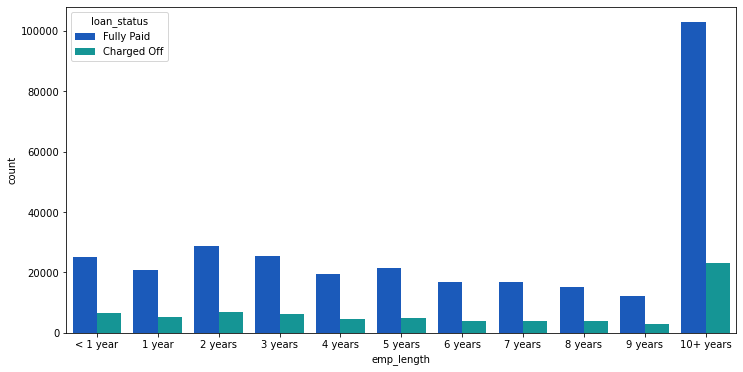

In [40]:
#Plotting out the countplot with a hue separating Fully Paid vs Charged Off
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',hue='loan_status',data=df,order=emp_length_sorted,palette='winter')

In [41]:
# At first glance there appears to be a similar percentage between total # of loans vs loan_status for each year of emp_length
#I will still calculate to be certain

In [42]:
len(df)

396030

In [43]:
df.groupby(['loan_status','emp_length'])['term'].count()

loan_status  emp_length
Charged Off  1 year          5154
             10+ years      23215
             2 years         6924
             3 years         6182
             4 years         4608
             5 years         5092
             6 years         3943
             7 years         4055
             8 years         3829
             9 years         3070
             < 1 year        6563
Fully Paid   1 year         20728
             10+ years     102826
             2 years        28903
             3 years        25483
             4 years        19344
             5 years        21403
             6 years        16898
             7 years        16764
             8 years        15339
             9 years        12244
             < 1 year       25162
Name: term, dtype: int64

In [44]:
df.groupby(['loan_status','emp_length']).count()

loan_amnt    term  int_rate  installment   grade  \
loan_status emp_length                                                     
Charged Off 1 year           5154    5154      5154         5154    5154   
            10+ years       23215   23215     23215        23215   23215   
            2 years          6924    6924      6924         6924    6924   
            3 years          6182    6182      6182         6182    6182   
            4 years          4608    4608      4608         4608    4608   
            5 years          5092    5092      5092         5092    5092   
            6 years          3943    3943      3943         3943    3943   
            7 years          4055    4055      4055         4055    4055   
            8 years          3829    3829      3829         3829    3829   
            9 years          3070    3070      3070         3070    3070   
            < 1 year         6563    6563      6563         6563    6563   
Fully Paid  1 year          20728   20728     20728        20728   20728   
            10+ years      102826  102826    102826       102826  102826   
            2 years         28903   28903     28903        28903   28903   
            3 years         25483   25483     25483        25483   25483   
            4 years         19344   19344     19344        19344   19344   
            5 years         21403   21403     21403        21403   21403   
            6 years         16898   16898     16898        16898   16898   
            7 years         16764   16764     16764        16764   16764   
            8 years         15339   15339     15339        15339   15339   
            9 years         12244   12244     12244        12244   12244   
            < 1 year        25162   25162     25162        25162   25162   

                        sub_grade  home_ownership  annual_inc  \
loan_status emp_length                                          
Charged Off 1 year           5154            5154        5154   
            10+ years       23215           23215       23215   
            2 years          6924            6924        6924   
            3 years          6182            6182        6182   
            4 years          4608            4608        4608   
            5 years          5092            5092        5092   
            6 years          3943            3943        3943   
            7 years          4055            4055        4055   
            8 years          3829            3829        3829   
            9 years          3070            3070        3070   
            < 1 year         6563            6563        6563   
Fully Paid  1 year          20728           20728       20728   
            10+ years      102826          102826      102826   
            2 years         28903           28903       28903   
            3 years         25483           25483       25483   
            4 years         19344           19344       19344   
            5 years         21403           21403       21403   
            6 years         16898           16898       16898   
            7 years         16764           16764       16764   
            8 years         15339           15339       15339   
            9 years         12244           12244       12244   
            < 1 year        25162           25162       25162   

                        verification_status  issue_d  ...  pub_rec  revol_bal  \
loan_status emp_length                                ...                       
Charged Off 1 year                     5154     5154  ...     5154       5154   
            10+ years                 23215    23215  ...    23215      23215   
            2 years                    6924     6924  ...     6924       6924   
            3 years                    6182     6182  ...     6182       6182   
            4 years                    4608     4608  ...     4608       4608   
            5 years                    5092     5092  ...     5092     

In [45]:
df[df['loan_status'] == 'Charged Off'].groupby(['loan_status','emp_length']).count()

loan_amnt   term  int_rate  installment  grade  \
loan_status emp_length                                                   
Charged Off 1 year           5154   5154      5154         5154   5154   
            10+ years       23215  23215     23215        23215  23215   
            2 years          6924   6924      6924         6924   6924   
            3 years          6182   6182      6182         6182   6182   
            4 years          4608   4608      4608         4608   4608   
            5 years          5092   5092      5092         5092   5092   
            6 years          3943   3943      3943         3943   3943   
            7 years          4055   4055      4055         4055   4055   
            8 years          3829   3829      3829         3829   3829   
            9 years          3070   3070      3070         3070   3070   
            < 1 year         6563   6563      6563         6563   6563   

                        sub_grade  home_ownership  annual_inc  \
loan_status emp_length                                          
Charged Off 1 year           5154            5154        5154   
            10+ years       23215           23215       23215   
            2 years          6924            6924        6924   
            3 years          6182            6182        6182   
            4 years          4608            4608        4608   
            5 years          5092            5092        5092   
            6 years          3943            3943        3943   
            7 years          4055            4055        4055   
            8 years          3829            3829        3829   
            9 years          3070            3070        3070   
            < 1 year         6563            6563        6563   

                        verification_status  issue_d  ...  pub_rec  revol_bal  \
loan_status emp_length                                ...                       
Charged Off 1 year                     5154     5154  ...     5154       5154   
            10+ years                 23215    23215  ...    23215      23215   
            2 years                    6924     6924  ...     6924       6924   
            3 years                    6182     6182  ...     6182       6182   
            4 years                    4608     4608  ...     4608       4608   
            5 years                    5092     5092  ...     5092       5092   
            6 years                    3943     3943  ...     3943       3943   
            7 years                    4055     4055  ...     4055       4055   
            8 years                    3829     3829  ...     3829       3829   
            9 years                    3070     3070  ...     3070       3070   
            < 1 year                   6563     6563  ...     6563       6563   

                        revol_util  total_acc  initial_list_status  \
loan_status emp_length                                               
Charged Off 1 year            5148       5154                 5154   
            10+ years        23200      23215                23215   
            2 years           6918       6924                 6924   
            3 years           6179       6182                 6182   
            4 years           4603       4608                 4608   
            5 years           5088       5092                 5092   
            6 years           3942       3943                 3943   
            7 years           4052       4055                 4055   
            8 years           3823       3829                 3829   
            9 years           3068       3070                 3070   
            < 1 year          6555       6563                 6563   

                        application_type  mort_acc  pub_rec_bankruptcies  \
loan_status emp_length                                                     
Charged Off 1 year                  5154      4732                  5141   
            10+ years 

In [46]:
df[df['loan_status'] == 'Fully Paid'].groupby(['loan_status','emp_length']).count()

loan_amnt    term  int_rate  installment   grade  \
loan_status emp_length                                                     
Fully Paid  1 year          20728   20728     20728        20728   20728   
            10+ years      102826  102826    102826       102826  102826   
            2 years         28903   28903     28903        28903   28903   
            3 years         25483   25483     25483        25483   25483   
            4 years         19344   19344     19344        19344   19344   
            5 years         21403   21403     21403        21403   21403   
            6 years         16898   16898     16898        16898   16898   
            7 years         16764   16764     16764        16764   16764   
            8 years         15339   15339     15339        15339   15339   
            9 years         12244   12244     12244        12244   12244   
            < 1 year        25162   25162     25162        25162   25162   

                        sub_grade  home_ownership  annual_inc  \
loan_status emp_length                                          
Fully Paid  1 year          20728           20728       20728   
            10+ years      102826          102826      102826   
            2 years         28903           28903       28903   
            3 years         25483           25483       25483   
            4 years         19344           19344       19344   
            5 years         21403           21403       21403   
            6 years         16898           16898       16898   
            7 years         16764           16764       16764   
            8 years         15339           15339       15339   
            9 years         12244           12244       12244   
            < 1 year        25162           25162       25162   

                        verification_status  issue_d  ...  pub_rec  revol_bal  \
loan_status emp_length                                ...                       
Fully Paid  1 year                    20728    20728  ...    20728      20728   
            10+ years                102826   102826  ...   102826     102826   
            2 years                   28903    28903  ...    28903      28903   
            3 years                   25483    25483  ...    25483      25483   
            4 years                   19344    19344  ...    19344      19344   
            5 years                   21403    21403  ...    21403      21403   
            6 years                   16898    16898  ...    16898      16898   
            7 years                   16764    16764  ...    16764      16764   
            8 years                   15339    15339  ...    15339      15339   
            9 years                   12244    12244  ...    12244      12244   
            < 1 year                  25162    25162  ...    25162      25162   

                        revol_util  total_acc  initial_list_status  \
loan_status emp_length                                               
Fully Paid  1 year           20712      20728                20728   
            10+ years       102766     102826               102826   
            2 years          28886      28903                28903   
            3 years          25468      25483                25483   
            4 years          19333      19344                19344   
            5 years          21391      21403                21403   
            6 years          16884      16898                16898   
            7 years          16747      16764                16764   
            8 years          15327      15339                15339   
            9 years          12235      12244                12244   
            < 1 year         25139      25162                25162   

                        application_type  mort_acc  pub_rec_bankruptcies  \
loan_status emp_length                                                     
Fully Paid  1 year                 20728     18126                 20666

In [47]:
emp_paid = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

In [48]:
emp_coff = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

In [49]:
emp_coff/emp_paid

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [50]:
#As we can see from the above charge off rates are extremely similar across all employment lengths. Will be dropping the emp_length column as well
df = df.drop('emp_length',axis=1)

In [51]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [52]:
# Dropping Title column as it is the same as purpose
df = df.drop('title',axis=1)

In [53]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [54]:
# Now to deal with the mort_acc column which is last major problematic column(containing null values)

In [55]:
feat_info('mort_acc')

Number of mortgage accounts.


In [56]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [57]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

# Graph of mort_acc distribution

[(-0.5, 15.0)]

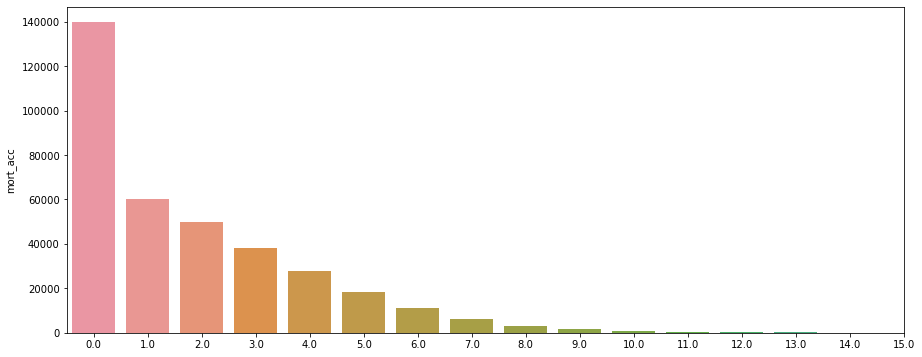

In [58]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['mort_acc'].value_counts().index, y=df['mort_acc'].value_counts())
ax.set(xlim=(-.5,15))

In [59]:
#tuple unpacking for weighted sum?
s = df['mort_acc'].value_counts(normalize=True)

In [60]:
#tuple unpacking for weighted sum?
res = [(val, idx) for idx, val in s.iteritems()]

In [61]:
#tuple unpacking for weighted sum?
ress = [(val * idx) for idx, val in s.iteritems()]

In [62]:
res

[(0.39018242215305593, 0.0),
 (0.1686490711404525, 1.0),
 (0.1394280290870518, 2.0),
 (0.10621240247323684, 3.0),
 (0.07784554831325806, 4.0),
 (0.050787890630452075, 5.0),
 (0.030898711739500605, 6.0),
 (0.01689393833656678, 7.0),
 (0.008712158220162742, 8.0),
 (0.004622663893812721, 9.0),
 (0.0024146161039541084, 10.0),
 (0.0013371111142127373, 11.0),
 (0.0007369464178542018, 12.0),
 (0.0004075537007830056, 13.0),
 (0.0002986866163272712, 14.0),
 (0.00017027928594358453, 15.0),
 (0.00010328415704774798, 16.0),
 (6.141220148785015e-05, 17.0),
 (5.0246346671877396e-05, 18.0),
 (4.187195555989783e-05, 19.0),
 (3.628902815191146e-05, 20.0),
 (2.7914637039931888e-05, 24.0),
 (1.954024592795232e-05, 22.0),
 (1.1165854815972756e-05, 21.0),
 (1.1165854815972756e-05, 25.0),
 (8.374391111979566e-06, 27.0),
 (5.582927407986378e-06, 23.0),
 (5.582927407986378e-06, 32.0),
 (5.582927407986378e-06, 26.0),
 (5.582927407986378e-06, 31.0),
 (2.791463703993189e-06, 30.0),
 (2.791463703993189e-06, 28.0)

In [63]:
sum(ress)

1.8139908160844143

In [64]:
#checking to see value of mort_acc mean when less then 5 since most of the values fall into this scenario
df[df['mort_acc'] < 5].describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid
count,316077.000000,316077.000000,316077.000000,3.160770e+05,316077.000000,316077.000000,316077.000000,3.160770e+05,315886.000000,316077.000000,316077.000000,316077.000000,316077.000000
mean,13953.142826,13.877493,430.285516,7.118215e+04,17.924701,11.397508,0.192694,1.511907e+04,54.122336,24.615534,1.221244,0.129810,0.792057
std,8169.548768,4.488633,245.875417,5.821903e+04,19.781402,5.173800,0.557271,1.892868e+04,23.971887,11.506508,1.351621,0.366801,0.405836
min,1000.000000,5.320000,21.620000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000
25%,8000.000000,10.990000,254.540000,4.500000e+04,11.720000,8.000000,0.000000,6.027000e+03,36.600000,16.000000,0.000000,0.000000,1.000000
50%,12000.000000,13.650000,375.000000,6.038373e+04,17.450000,10.000000,0.000000,1.090200e+04,55.000000,23.000000,1.000000,0.000000,1.000000
75%,19200.000000,16.990000,561.270000,8.500000e+04,23.670000,14.000000,0.000000,1.876200e+04,72.700000,31.000000,2.000000,0.000000,1.000000
max,40000.000000,30.990000,1527.000000,8.706582e+06,9999.000000,90.000000,86.000000,1.298783e+06,892.300000,151.000000,4.000000,8.000000,1.000000


In [65]:
#deciding to go with a weighted mean instead as to not exclude some of the data.

In [66]:
df['mort_acc'].mean()

1.8139908160844138

In [67]:
#Now checking to see which column most correlates to possibly deal with missing data in mort_acc to see if there is a better option then just mort_acc weighted mean
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [68]:
df['mort_acc'].describe()

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

In [69]:
(df['mort_acc'] <= 4).sum()

316077

In [70]:
len(df['mort_acc'])

396030

In [71]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [72]:
#.318 correlation isn't that great, will be taking a weighted mean of mort_acc to fill in null values

In [73]:
#weighted average of mort_acc
new_m = ((.4*0) + .17*(1) + (.14)*2 + (0.1)*3 + (.07)*4 +  (0.05)*5)/.93

In [74]:
new_m = round(new_m,4)

In [75]:
new_m 

1.3763

In [76]:
df['mort_acc'].fillna(new_m,inplace=True)

In [77]:
df['mort_acc'].isna().sum()

0

In [78]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [79]:
#revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data.
df.drop(['revol_util','pub_rec_bankruptcies'],axis=1,inplace=True)

In [80]:
df.isna().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
loan_repaid            0
dtype: int64

In [81]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')


# Looking through all the string features


In [82]:
df['term'] = df['term'].apply(lambda x: int(x[:3]))

In [83]:
df['term'].value_counts()

36    302005
60     94025
Name: term, dtype: int64

In [84]:
df['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [85]:
df['sub_grade'].value_counts()

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

In [86]:
#subgrade more specific and shows grade anyways, will drop grade column
df.drop('grade',axis=1,inplace=True)

In [87]:
#Convert the subgrade into dummy variables. 
#Then concatenate these new columns to the original dataframe
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [88]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [89]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'address', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [90]:
#now to get a list of remaining columns to create dummy variables for
df.select_dtypes([object]).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [91]:
feat_info('home_ownership')

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


In [92]:
feat_info('verification_status')

Indicates if income was verified by LC, not verified, or if the income source was verified


In [93]:
for x in df.select_dtypes([object]).columns:
    if x == 'address':
        pass
    else:
        print(x)
        feat_info(x)

home_ownership
The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
verification_status
Indicates if income was verified by LC, not verified, or if the income source was verified
issue_d
The month which the loan was funded
loan_status
Current status of the loan
purpose
A category provided by the borrower for the loan request. 
earliest_cr_line
The month the borrower's earliest reported credit line was opened
initial_list_status
The initial listing status of the loan. Possible values are – W, F
application_type
Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [94]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [95]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [96]:
# I will change none and any to other before converting to dummy variables
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [97]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

In [98]:
df.drop('home_ownership',axis=1, inplace=True)
df = pd.concat([df,dummies],axis=1)

In [99]:
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [100]:
df['address'][0][-5:]

'22690'

In [101]:
df['zip_code'] = df['address'].apply(lambda x: x[-5:])

In [102]:
df['zip_code'].head()

0    22690
1    05113
2    05113
3    00813
4    11650
Name: zip_code, dtype: object

In [103]:
#Will now be getting dummy variables for the zipcode column and dropping the address colum
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df.drop('address',axis=1,inplace=True)

In [104]:
df = pd.concat([df,dummies],axis=1)
df.drop('zip_code',axis=1,inplace=True)

In [105]:
feat_info('issue_d')

The month which the loan was funded


In [106]:
#since we are building a model to predict whether or not a person will pay back a loan.  
#Since this is an indicator whether or not the loan will be given, this column happens after the decision has been made,
#rendering the data in this column unuseful for what we are trying to predict.

In [107]:
df.drop('issue_d',axis=1,inplace=True)

In [108]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 396030, dtype: object

In [109]:
#will extract the year from the column
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x:int(x[-4:]))
df.drop('earliest_cr_line',axis=1,inplace=True)

In [110]:
#The rest of the columns are good to replace with dummies
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1,inplace=True)
df = pd.concat([df,dummies],axis=1)

In [111]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [112]:
#last of the object type columns
df.drop('loan_status',axis=1,inplace=True)

In [113]:
df['loan_repaid'].value_counts()

1    318357
0     77673
Name: loan_repaid, dtype: int64

In [114]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'mort_acc',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5', 'OTHER', 'OWN', 'RENT', '05113', '11650', '22690', '29597',
       '30723', '48052', '70466', '86630', '93700', 'earliest_cr_year',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vaca

## Train Test Split

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
#Set X and y variables to the .values of the features and label
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Normalizing the Data

In [118]:
#Now to normalize the feature data X_train and X_test.  We do not want data leakage so we only fit on X_train
from sklearn.preprocessing import MinMaxScaler

In [119]:
scaler = MinMaxScaler()

In [120]:
X_train = scaler.fit_transform(X_train)

In [121]:
X_test = scaler.transform(X_test)

# Creating the Model


In [122]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [123]:
X_train.shape

(316824, 76)

In [124]:
model=Sequential()

In [125]:
model.add(Dense(76,activation='relu'))
model.add(Dropout(.2))

model.add(Dense(38,activation='relu'))
model.add(Dropout(.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [126]:
model.fit(x=X_train,y=y_train,epochs=20,batch_size=256,validation_data=(X_test,y_test))

Train on 316824 samples, validate on 79206 samples
Epoch 1/20
316824/316824 [==============================] - 3s 9us/sample - loss: 0.2965 - val_loss: 0.2620
Epoch 2/20
316824/316824 [==============================] - 3s 8us/sample - loss: 0.2658 - val_loss: 0.2608
Epoch 3/20
316824/316824 [==============================] - 3s 8us/sample - loss: 0.2637 - val_loss: 0.2610
Epoch 4/20
316824/316824 [==============================] - 3s 8us/sample - loss: 0.2625 - val_loss: 0.2595
Epoch 5/20
316824/316824 [==============================] - 3s 8us/sample - loss: 0.2620 - val_loss: 0.2589
Epoch 6/20
316824/316824 [==============================] - 3s 8us/sample - loss: 0.2613 - val_loss: 0.2585
Epoch 7/20
316824/316824 [==============================] - 3s 8us/sample - loss: 0.2609 - val_loss: 0.2591
Epoch 8/20
316824/316824 [==============================] - 3s 8us/sample - loss: 0.2602 - val_loss: 0.2588
Epoch 9/20
316824/316824 [==============================] - 3s 8us/sample - loss: 0.2

In [127]:
from tensorflow.keras.models import load_model

In [128]:
model.save('loan_data_model.h5')

# Evaluating Model Performance.

In [129]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

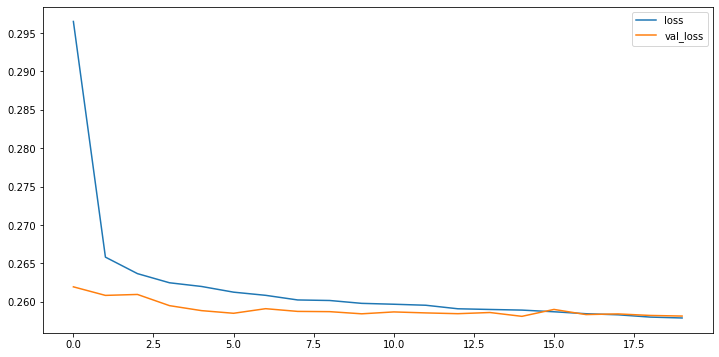

In [130]:
losses[['loss','val_loss']].plot(figsize=(12,6))

# Predictions from the X_test set and a classification report and confusion matrix for the X_test set

In [131]:
from sklearn.metrics import classification_report,confusion_matrix

In [132]:
predictions = model.predict_classes(X_test)

In [133]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.46      0.62     15493
           1       0.88      0.99      0.94     63713

    accuracy                           0.89     79206
   macro avg       0.91      0.73      0.78     79206
weighted avg       0.90      0.89      0.87     79206



In [134]:
confusion_matrix(y_test,predictions)

array([[ 7119,  8374],
       [  415, 63298]], dtype=int64)

# Testing on a random Sample from the DataFrame

In [135]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt                   24000.00
term                           60.00
int_rate                       13.11
installment                   547.43
annual_inc                  85000.00
                              ...   
purpose_other                   0.00
purpose_renewable_energy        0.00
purpose_small_business          0.00
purpose_vacation                0.00
purpose_wedding                 0.00
Name: 304691, Length: 76, dtype: float64

In [136]:
model.predict_classes(new_customer.values.reshape(1,76))

array([[1]])

In [137]:
#Now did this person actually end up paying off their loan?
df.iloc[random_ind]['loan_repaid']

1.0

In [139]:
#YES